# HAR adathalmaz

[Forrás](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones)

Az emberi cselekvés felismerése (Human Activity Recognition, HAR) problémakör alapvető célja, hogy az ember mozgásának követésével megjósolja mit csinál éppen az illető. 
A felhasznált adatlahmaz 30 személy adatait tartalmazza, akik hat tevékenység egyikét végezték, miközben derékra erősített okostelefont viseltek. Az okostelefon szenzorai rögzítették a mozgás adatait. A rögzített mozgásadatok az x, y és z gyorsulásmérő adatai és giroszkópos adatok. Az idősoros szenzor adatokat előfeldolgozást követően felosztották 2,65 másodperces szakaszokra. Ezek a szakaszok 128 mérési pontot tartalmaznak, összesen 9 csatornán.

Hat cselekvést különböztetnek meg az adathalmazban:
- Járás
- Lépcsőzés felfelé
- Lépcsőzés lefelé
- Ülés
- Állás
- Fekvés

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

# saját osztályok/függények importálása
from src.layers.conv import ConvLayerND
from src.layers.dense import DenseLayer
from src.layers.flatten import FlattenLayer
from src.layers.pool import MaxPoolLayerND
from src.model import Model
from src.metrics import accuracy_categ_ce
from src.optimizers import gradient_descent

## Előfeldolgozott adatok betöltése

In [2]:
with open("data/HAR_dataset.pkl", "rb") as f:
    X_train, y_train, X_test, y_test = pickle.load(f)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7352, 128, 9) (7352, 6)
(2947, 128, 9) (2947, 6)


Mint láthatjuk, egy minta 128 mérési pontot tartlmaz, összesen 9 szenzor adatot pontonként.   Szemléltetés képpen kirajzoltattam az első mintához tartozó szenzor adatokat.

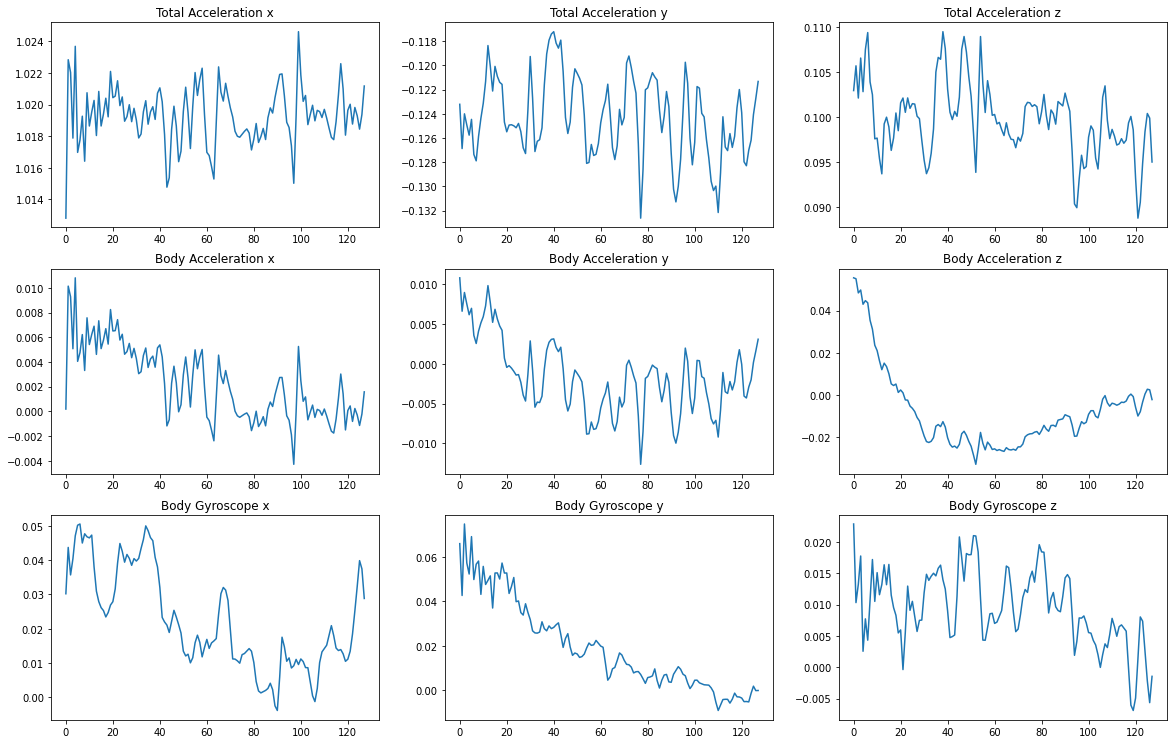

In [3]:
data = X_train[0]
_, n = data.shape

titles = ["Total Acceleration x" ,"Total Acceleration y" ,"Total Acceleration z" ,"Body Acceleration x" ,"Body Acceleration y" ,"Body Acceleration z" ,"Body Gyroscope x" ,"Body Gyroscope y" ,"Body Gyroscope z"]

plt.figure(figsize=(20,40))
for i in range(n):
    ax = plt.subplot(n,3,i+1)
    ax.plot(data[:,i])
    ax.title.set_text(titles[i])
plt.show()

## Konvolúciós neurális háló architektúrájának megadása

Az adathalmaz alapján egy konvolúciós neurális hálót tanítok be, ami az 1 dimenziós szenzor adatokat időben konvolválja. Ehhez felhasználom az általam írt N-dimenziós konvolúciós réteget, és pooling réteget.

In [4]:
layers = [
    ConvLayerND(filters=32, kernel_shape=(7,9), activation="relu"),
    MaxPoolLayerND(pool_size=2, stride=2),
    FlattenLayer(),
    DenseLayer(nodes_prev=1952, nodes_curr=100, activation="relu"),
    DenseLayer(nodes_prev=100, nodes_curr=6, activation="softmax")
]

model = Model(
    layers=layers, 
    optimizer=gradient_descent,
    costfn="CCE"  # categorical cross-entropy
)

# Model tanítása

In [5]:
hist = model.fit(X_train, y_train, epoch=10, lr=0.005, batch_size=4)

Iteration: 1	 cost: 0.97975	accuracy: 66.05%
Iteration: 2	 cost: 0.81176	accuracy: 74.01%
Iteration: 3	 cost: 0.66994	accuracy: 77.54%
Iteration: 4	 cost: 0.58462	accuracy: 80.43%
Iteration: 5	 cost: 0.51799	accuracy: 82.43%
Iteration: 6	 cost: 0.43881	accuracy: 84.62%
Iteration: 7	 cost: 0.37625	accuracy: 86.60%
Iteration: 8	 cost: 0.32319	accuracy: 88.19%
Iteration: 9	 cost: 0.28119	accuracy: 89.57%
Iteration: 10	 cost: 0.24730	accuracy: 90.57%


In [6]:
# accuracy a teszt adathalmazon
accuracy_categ_ce(y=y_test, y_hat=model.predict(X_test))

0.8266033254156769

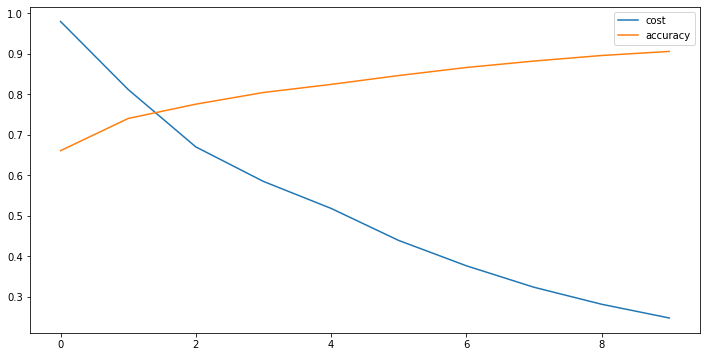

In [7]:
plt.figure(figsize=(12,6))
plt.plot(hist)
plt.legend(['cost', 'accuracy'])
plt.show()